<a href="https://colab.research.google.com/github/EbtisamElgerghani/-Datasets_Task/blob/main/Copy_of_NLP_week15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install NLTK

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> words


      Unzipping corpora/words.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
text = "Tesla shareholders have backed a record- breaking pay package for Elon Musk and approve a plan to move \
        the firm's legal headquarters to Taxas."
tokens = word_tokenize(text)
print(tokens)

['Tesla', 'shareholders', 'have', 'backed', 'a', 'record-', 'breaking', 'pay', 'package', 'for', 'Elon', 'Musk', 'and', 'approve', 'a', 'plan', 'to', 'move', 'the', 'firm', "'s", 'legal', 'headquarters', 'to', 'Taxas', '.']


### Stop Words Removal

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(filtered_tokens)

['Tesla', 'shareholders', 'backed', 'record-', 'breaking', 'pay', 'package', 'Elon', 'Musk', 'approve', 'plan', 'move', 'firm', "'s", 'legal', 'headquarters', 'Taxas', '.']


### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print(lemmatized_tokens)


['Tesla', 'shareholder', 'backed', 'record-', 'breaking', 'pay', 'package', 'Elon', 'Musk', 'approve', 'plan', 'move', 'firm', "'s", 'legal', 'headquarters', 'Taxas', '.']


### Sentiment Analysis
NLTK provides a Sentiment intensity Analyzer class that analizes for its negative, neutral, and positive sentiment.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment_Score = analyzer.polarity_scores(text)
print(sentiment_Score)

{'neg': 0.061, 'neu': 0.826, 'pos': 0.113, 'compound': 0.0516}


### Part_Of_Speech Tagging
This example demonstrate how to tag each word in a sentence with its respective part off speech.

In [ ]:
from nltk import pos_tag
text = "Tesla shareholders have backed a record- breaking pay package for Elon Musk and approve a plan to move \
        the firm's legal headquarters to Taxas."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
print(pos_tags)


[('Tesla', 'NNP'), ('shareholders', 'NNS'), ('have', 'VBP'), ('backed', 'VBN'), ('a', 'DT'), ('record-', 'JJ'), ('breaking', 'NN'), ('pay', 'NN'), ('package', 'NN'), ('for', 'IN'), ('Elon', 'NNP'), ('Musk', 'NNP'), ('and', 'CC'), ('approve', 'VB'), ('a', 'DT'), ('plan', 'NN'), ('to', 'TO'), ('move', 'VB'), ('the', 'DT'), ('firm', 'NN'), ("'s", 'POS'), ('legal', 'JJ'), ('headquarters', 'NN'), ('to', 'TO'), ('Taxas', 'NNP'), ('.', '.')]


WE will use spaCy to access additional attributes (such as TAG, Explain, DEP, Shape, etc.)to create an informaive DataFrame.

In [ ]:
import spacy
import pandas as pd
# load th English language trained model - small moldel
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
# for token in doc:
pos = [(token.text, token.lemma_, token.pos_, token.tag_, spacy.explain(token.tag_), token.dep_, token.shape_, token.is_alpha, token.is_stop)for token in doc]
df = pd.DataFrame(pos, columns=['text', 'lemma','POS', 'TAG', 'Explain', 'DEP', 'Shape', 'Alpha', 'Stop'])
df


,text,lemma,POS,TAG,Explain,DEP,Shape,Alpha,Stop
0,Tesla,Tesla,PROPN,NNP,"noun, proper singular",compound,Xxxxx,True,False
1,shareholders,shareholder,NOUN,NNS,"noun, plural",nsubj,xxxx,True,False
2,have,have,AUX,VBP,"verb, non-3rd person singular present",aux,xxxx,True,True
3,backed,back,VERB,VBN,"verb, past participle",ROOT,xxxx,True,False
4,a,a,DET,DT,determiner,det,x,True,True
5,record-,record-,NOUN,NN,"noun, singular or mass",npadvmod,xxxx-,False,False
6,breaking,break,VERB,VBG,"verb, gerund or present participle",amod,xxxx,True,False
7,pay,pay,NOUN,NN,"noun, singular or mass",compound,xxx,True,False
8,package,package,NOUN,NN,"noun, singular or mass",dobj,xxxx,True,False
9,for,for,ADP,IN,"conjunction, subordinating or preposition",prep,xxx,True,True


### Named Entity Recognition
NLTK provides a ne_chunk function that performs NER.

In [ ]:
from nltk import ne_chunk
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
pos_tags = nltk.pos_tag(lemmatized_tokens)
ner_tags = ne_chunk(pos_tags)
print(ner_tags)

(S
  (GPE Tesla/NNP)
  shareholder/NN
  backed/VBD
  record-/JJ
  breaking/NN
  pay/NN
  package/NN
  (PERSON Elon/NNP Musk/NNP)
  approve/VB
  plan/NN
  move/VBP
  firm/NN
  's/POS
  legal/JJ
  headquarters/NN
  (PERSON Taxas/NNP)
  ./.)


Entity Recognition

In [ ]:
'''from nltk import ne_chunk
tokens = word_tokenize(text)
def remove_stop():
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


df['column_name'].apply(remove_stop)


lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
pos_tags = nltk.pos_tag(lemmatized_tokens)
ner_tags = ne_chunk(pos_tags)
print(ner_tags)'''

"from nltk import ne_chunk\ntokens = word_tokenize(text)\ndef remove_stop():\n    stop_words = set(stopwords.words('english'))\n    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]\n\n\ndf['column_name'].apply(remove_stop)\n\n\nlemmatizer = WordNetLemmatizer()\nlemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]\npos_tags = nltk.pos_tag(lemmatized_tokens)\nner_tags = ne_chunk(pos_tags)\nprint(ner_tags)"

### Word Frequency Distribution
we can analyse the frequency of words in the text.

In [ ]:
from nltk.probability import  FreqDist
fdist = FreqDist(lemmatized_tokens)
print(fdist.most_common(10))

[('Tesla', 1), ('shareholder', 1), ('backed', 1), ('record-', 1), ('breaking', 1), ('pay', 1), ('package', 1), ('Elon', 1), ('Musk', 1), ('approve', 1)]


We can visualize this distribution.

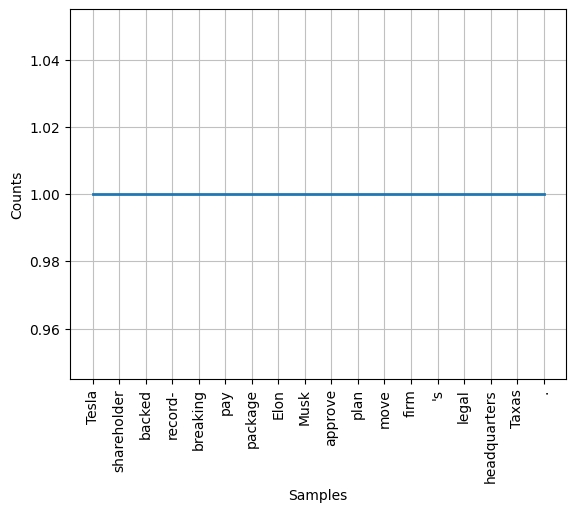

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(30, cumulative=False)